### Mini Project: Bigmart Sales Dataset

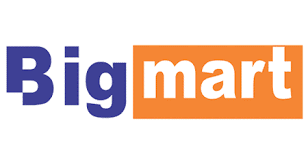

## Table of Contain
1. Introduction
2. Data Id
3. Libraries
4. File path
5. Preprocessing and Data Analysis
6. Machine learning models
7. Conclusion

### Introduction :
Problem Statement:
The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

Breakdown of the Problem Statement:
*  Supervised machine learning problem.
* The target value will be Item_Outlet_Sales.




Data Id 📋:

This dataset is named [BigMart Sales]. The dataset contains a set of 8,523 records under 12 attributes:

| Column Name                         | Description                                                    |
|------------------                   |----------------------------------------------------------------|
| `Item_Identifier`                   | Unique product ID                                              |
| `Item_Weight`                       | Weight of product                                              |
| `Item_Fat_Content`                  | Checks the Concentration of fat in the product                 |
| `Item_Visibility`                   | The % of total display area of all similar products in a store |
| `Item_Type`                         | Product Category                                               |
| `Item_MRP`                          | Maximum Retail Price for a Product                             |
| `Outlet_Identifier`                 | Store ID                                                       |
| `Outlet_Establishment_Year`         | The year in which store was established                        |
| `Outlet_Size`                       | The size of the store (Area Size Category)                     |
| `Outlet_Location_Type`              | In Terms of city Tiers (Size)                                  |
| `Outlet_Type`                       | Grocery store or a type of    supermarket                      |
| `Item_Outlet_Sales`                 | Sales of the product In the Specific outlet                    |

### **Importing the dependencies**
(Libraries)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## **Data Collection & Analysis**

In [2]:
#Loading the dataset from csv file to a Pandas DataFrame
bm_tr = pd.read_csv('/content/Train.csv')
bm_te = pd.read_csv('/content/Test.csv')

In [3]:
bm_tr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bm_te.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


size of each data set

In [5]:
bm_tr.shape

(8523, 12)

In [6]:
bm_te.shape

(5681, 11)

# preprocessing of the traininging dataset

In [7]:
#column information
bm_tr.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<ipython-input-7-71a0d261c308>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  bm_tr.info(verbose=True,null_counts=True)


In [8]:
#summary statistics test
bm_te.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
#summary statistics train
bm_tr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Missing values ❌

There are many ways data can end up with missing values. For example:


1.  The product wasn't weighed.
2.  The data provider didn't include the outlet size of some products.




Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

* by numbers
* by %

This analysis will also compare to the test and train datasets for evaluation.

In [10]:
#missing values in decsending order
print("train:\n")
print(bm_tr.isnull().sum().sort_values(ascending=False),"\n\n",bm_tr.isnull().sum()/bm_tr.shape[0]*100,"\n\n")
print("Test:\n")
print(bm_te.isnull().sum().sort_values(ascending=False),"\n\n",bm_te.isnull().sum()/bm_te.shape[0] *100,"\n\n")

train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

We can see the % of each missing Values per column is almost identical!

| column           | size |
|------------------|------|
| `Outlet_Size`    | 28%  |
| `Item_Weight`    | 17%  |

### Let's check the value counts for `Outlet_Size` and `Item_Weight`:

In [11]:
print("Outlet_Size:\n", bm_tr.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", bm_tr.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




`Outlet_Size` is a categorical column, therefore we will impute missing values with `Medium` the **mode value**

In [12]:
print("test mode, train mode\n",[bm_tr['Outlet_Size'].mode().values[0], bm_tr['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [13]:
#train
bm_tr['Outlet_Size'] = bm_tr['Outlet_Size'].fillna(
bm_tr['Outlet_Size'].dropna().mode().values[0])

#test
bm_te['Outlet_Size'] = bm_te['Outlet_Size'].fillna(
bm_te['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
bm_tr['Outlet_Size'].isnull().sum(),bm_te['Outlet_Size'].isnull().sum()

(0, 0)

`item_weight`  is a numerical column therefore we need to visualize it's distribution for a clearer display
i will use the boxplot in seaborn:

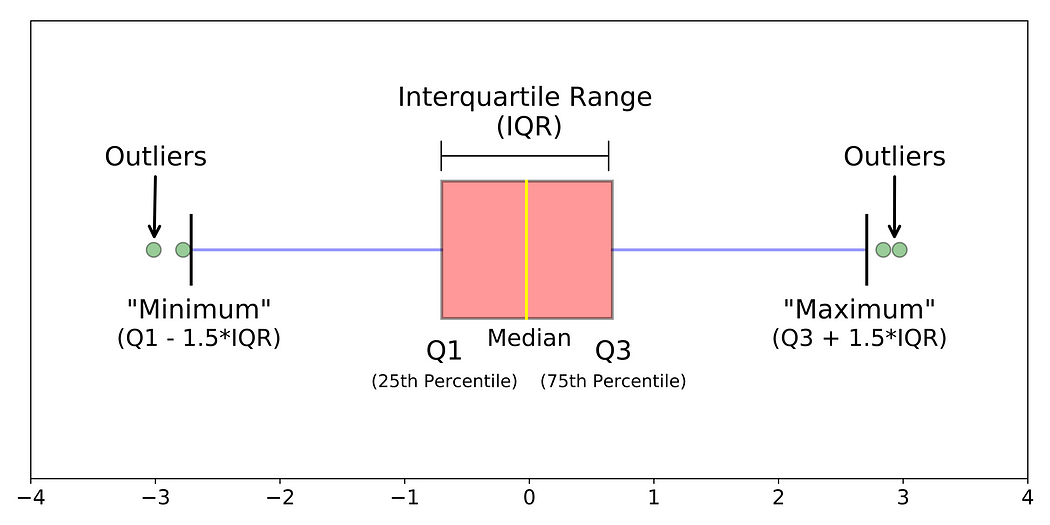

Text(0.5, 1.0, 'Item_Weight Boxplot')

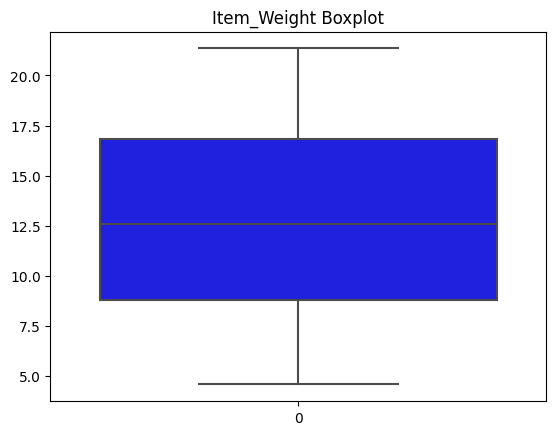

In [14]:
# I personally prefer a vertical view and a blue color
sns.boxplot(data=bm_tr['Item_Weight'],orient="k", color = 'b')
plt.title("Item_Weight Boxplot")

There are no outliers so we will fill the missing data with the mean value for maximum efficiency:

In [15]:
#train
bm_tr['Item_Weight'] = bm_tr['Item_Weight'].fillna(
bm_tr['Item_Weight'].dropna().mean())

#test
bm_te['Item_Weight'] = bm_te['Item_Weight'].fillna(
bm_te['Item_Weight'].dropna().mean())

#checking if we filled missing values
bm_tr['Item_Weight'].isnull().sum(),bm_te['Item_Weight'].isnull().sum()

(0, 0)

### Now we can see using the `.info()` method we can see we have filled succesfully all mising the missing data for both sets:

In [16]:
print("train:\n")
print(bm_tr.info())
print("\n\ntest:\n")
print(bm_te.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

# Data Exploration

## **LOADING**.......


Firstly we need to split our data to categorical and numerical data,

using the `.select_dtypes('dtype').columns.to_list()` combination.

In [17]:
#list of all the numeric columns
num = bm_tr.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = bm_tr.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  bm_tr[num]
#categoric df
BM_cat = bm_tr[cat]

#print(num)
#print(cat)

[bm_tr[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

We can See we have Repeating values with different names in the `Item_Fat_Content` column,
we will correct them using the using the `.replace()` method

In [18]:
#train
bm_tr['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
bm_te['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
bm_tr.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

LET'S look again in the data:

In [19]:
bm_tr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


`Outlet_Establishment_Year` is quite useless as it is, making a new column with the age the new name will be `Outlet_Age`

In [20]:
#creating new column for both datasets train & test
bm_tr['Outlet_Age'], bm_te['Outlet_Age']= bm_tr['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), bm_te['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

##uncomment to check result
#bm_tr['Outlet_Age'].head
#bm_te['Outlet_Age'].head

# Data Visualization 📊

### Univariate Plots
For starters we will create countplots for the categorical columns:

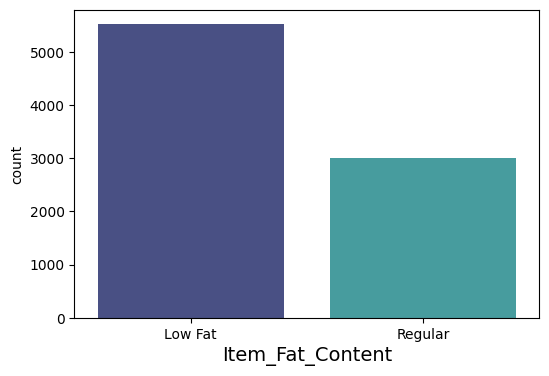

In [21]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=bm_tr ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

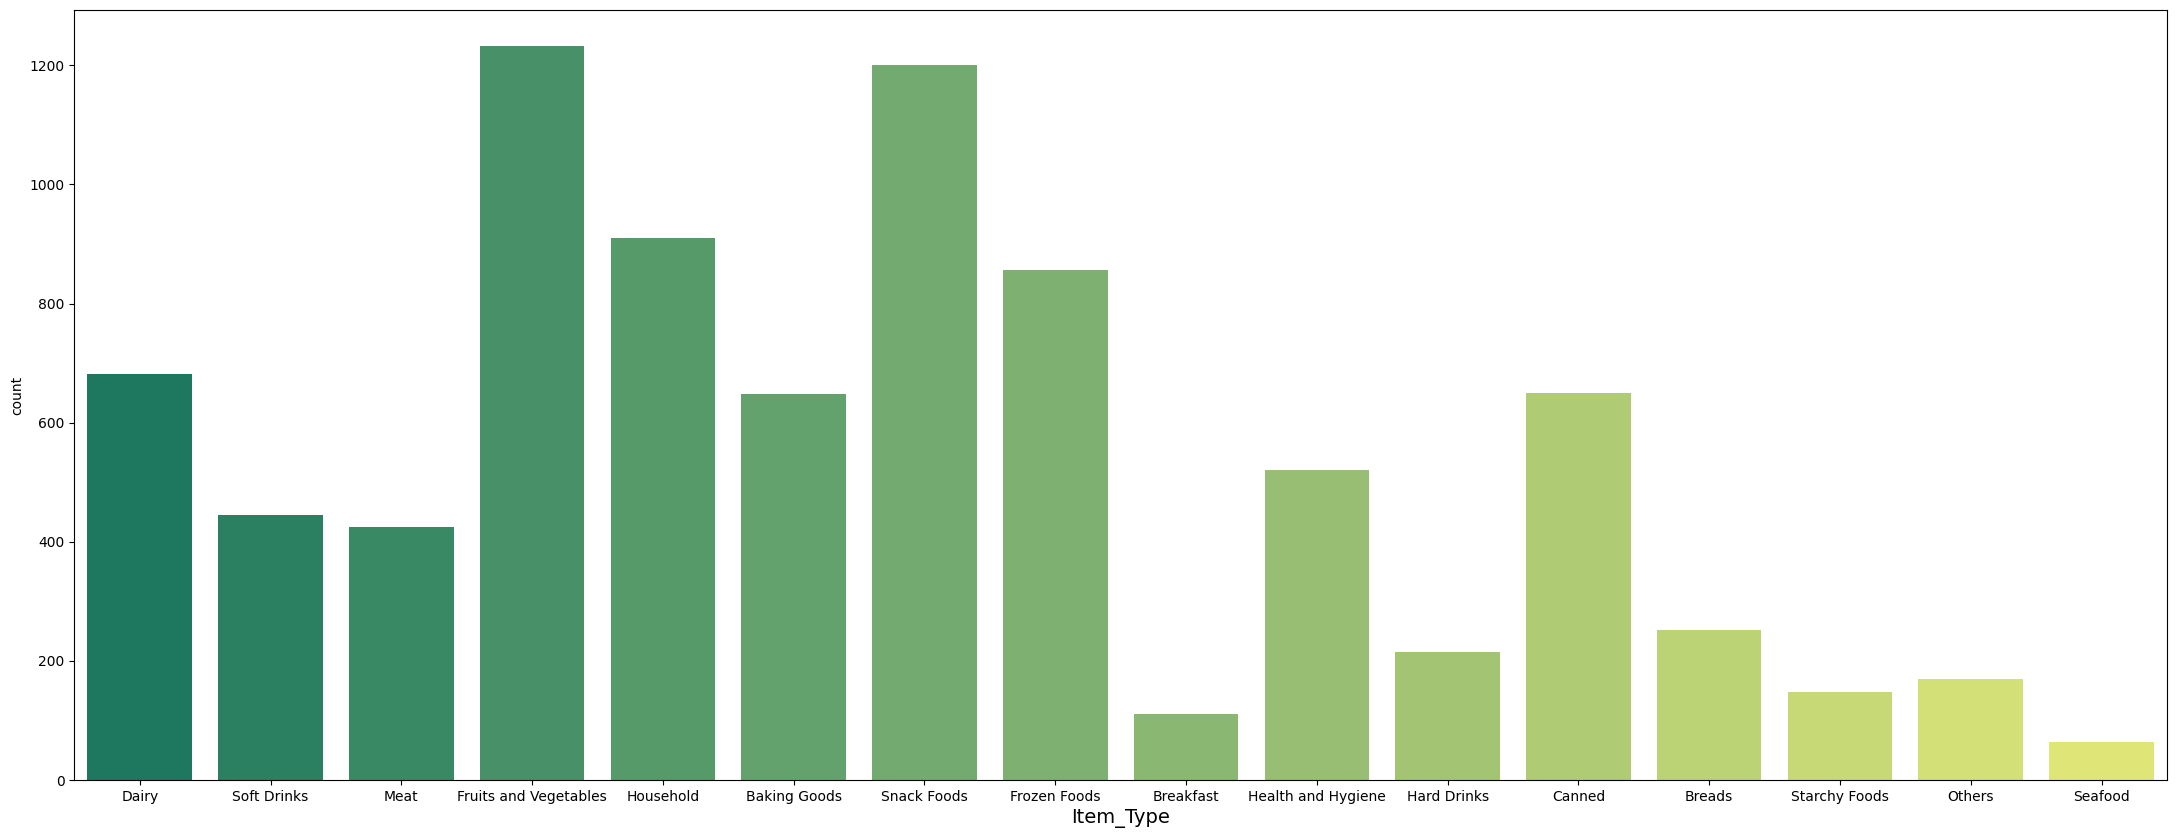

In [22]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=bm_tr ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

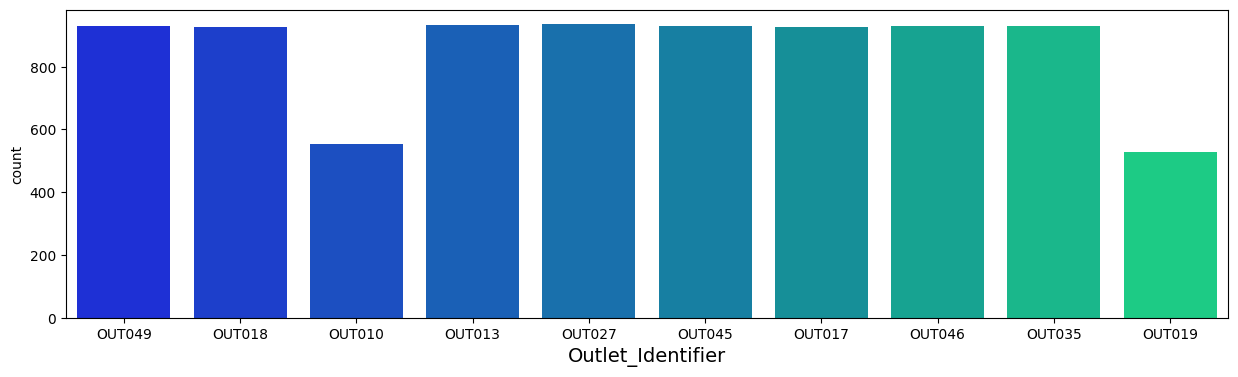

In [23]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=bm_tr ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

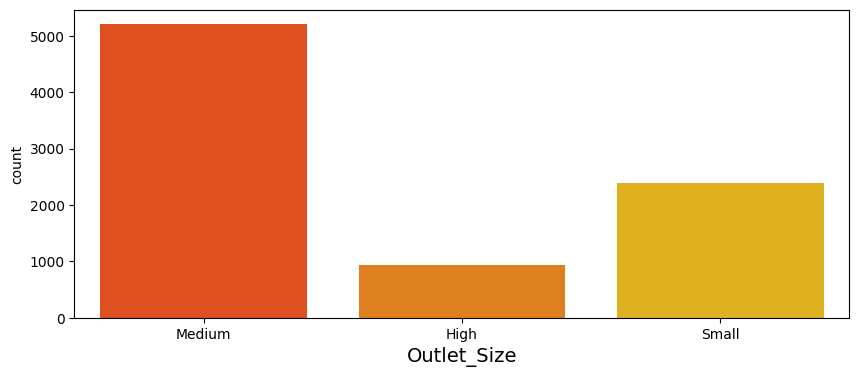

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=bm_tr ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

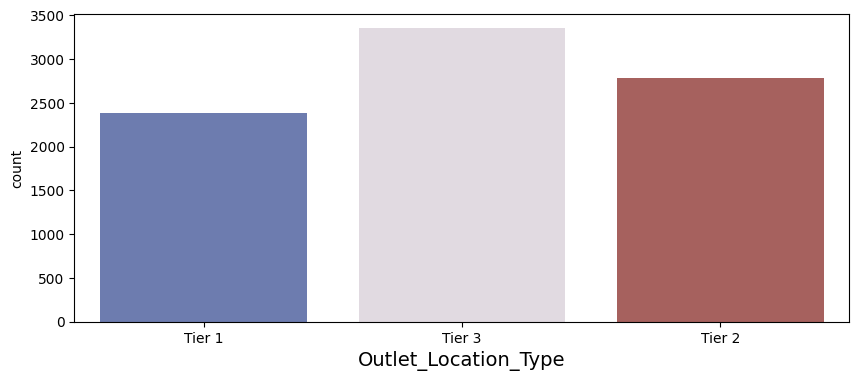

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=bm_tr ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

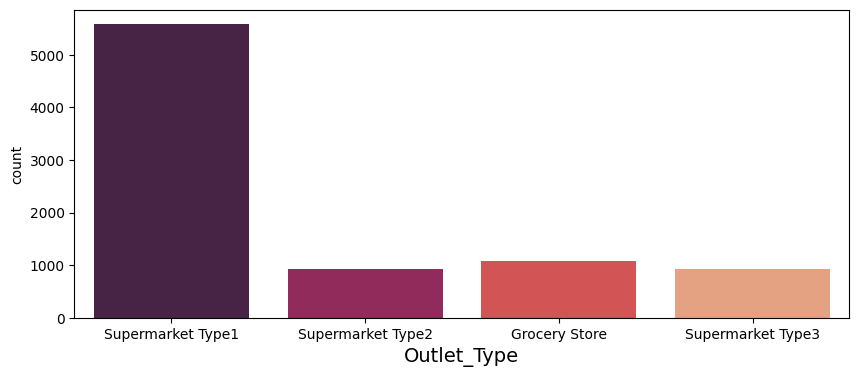

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=bm_tr ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

## Categoric columns realizations

* `Item_Fat_Content` - Most items sold are low fat.
* `Item_Type` - Item types that are distictly popular are `fruits and vegetables` and `snack foods`.
* `Outlet_Identifier` - Sold items are ditributed evenly among outlets excluding `OUT010` and `OUT019` that are significanly lower.
* `Outlet_Size` - Bigmart outlets are mostly medium sized in our data.
* `Outlet_Location_Type` - The most common type is `Tier3`.
* `Outlet_Type` - By a wide margin the mode outlet type is `Supermarket Type1`.

Now for the numerical columns:

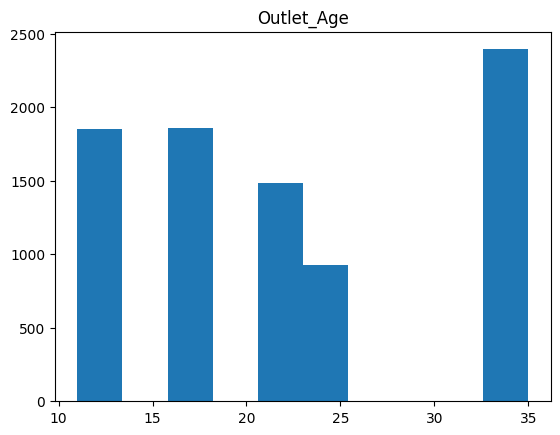

In [27]:
#list of all the numeric columns
num = bm_tr.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  bm_tr[num]

plt.hist(bm_tr['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

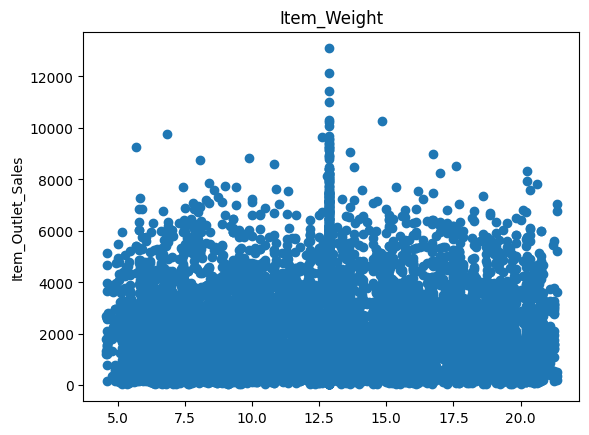

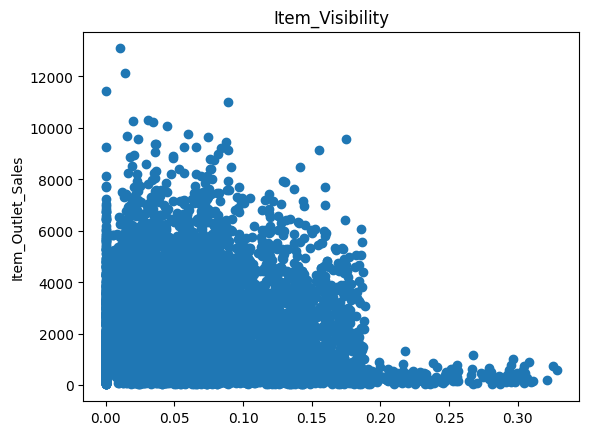

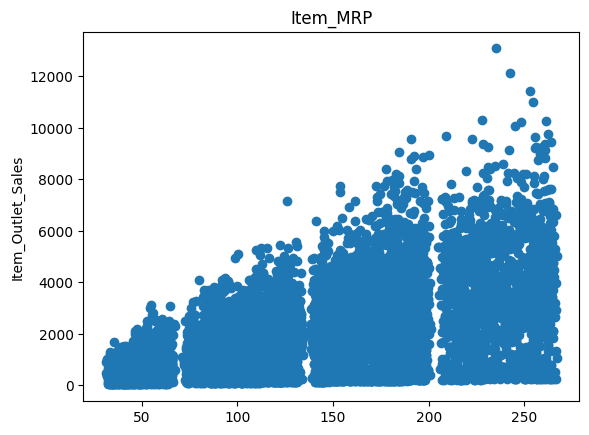

In [28]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

#### numeric columns realizations

* `Outlet_Age` - The most common outlets are 35 years old.
* `Item_Weight` - The data is very spreaded, no specific pattern.
* `Item_Visibility` - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
* `Item_MRP` - Items with higher MRP tend to sell better in most cases.


# Multivariate plots
I want to check the following relationships with `Item_Outlet_Sales`:
* Sales per item type
* Sales per outlet
* Sales per outlet type
* Sales per outlet size
* Sales per location type

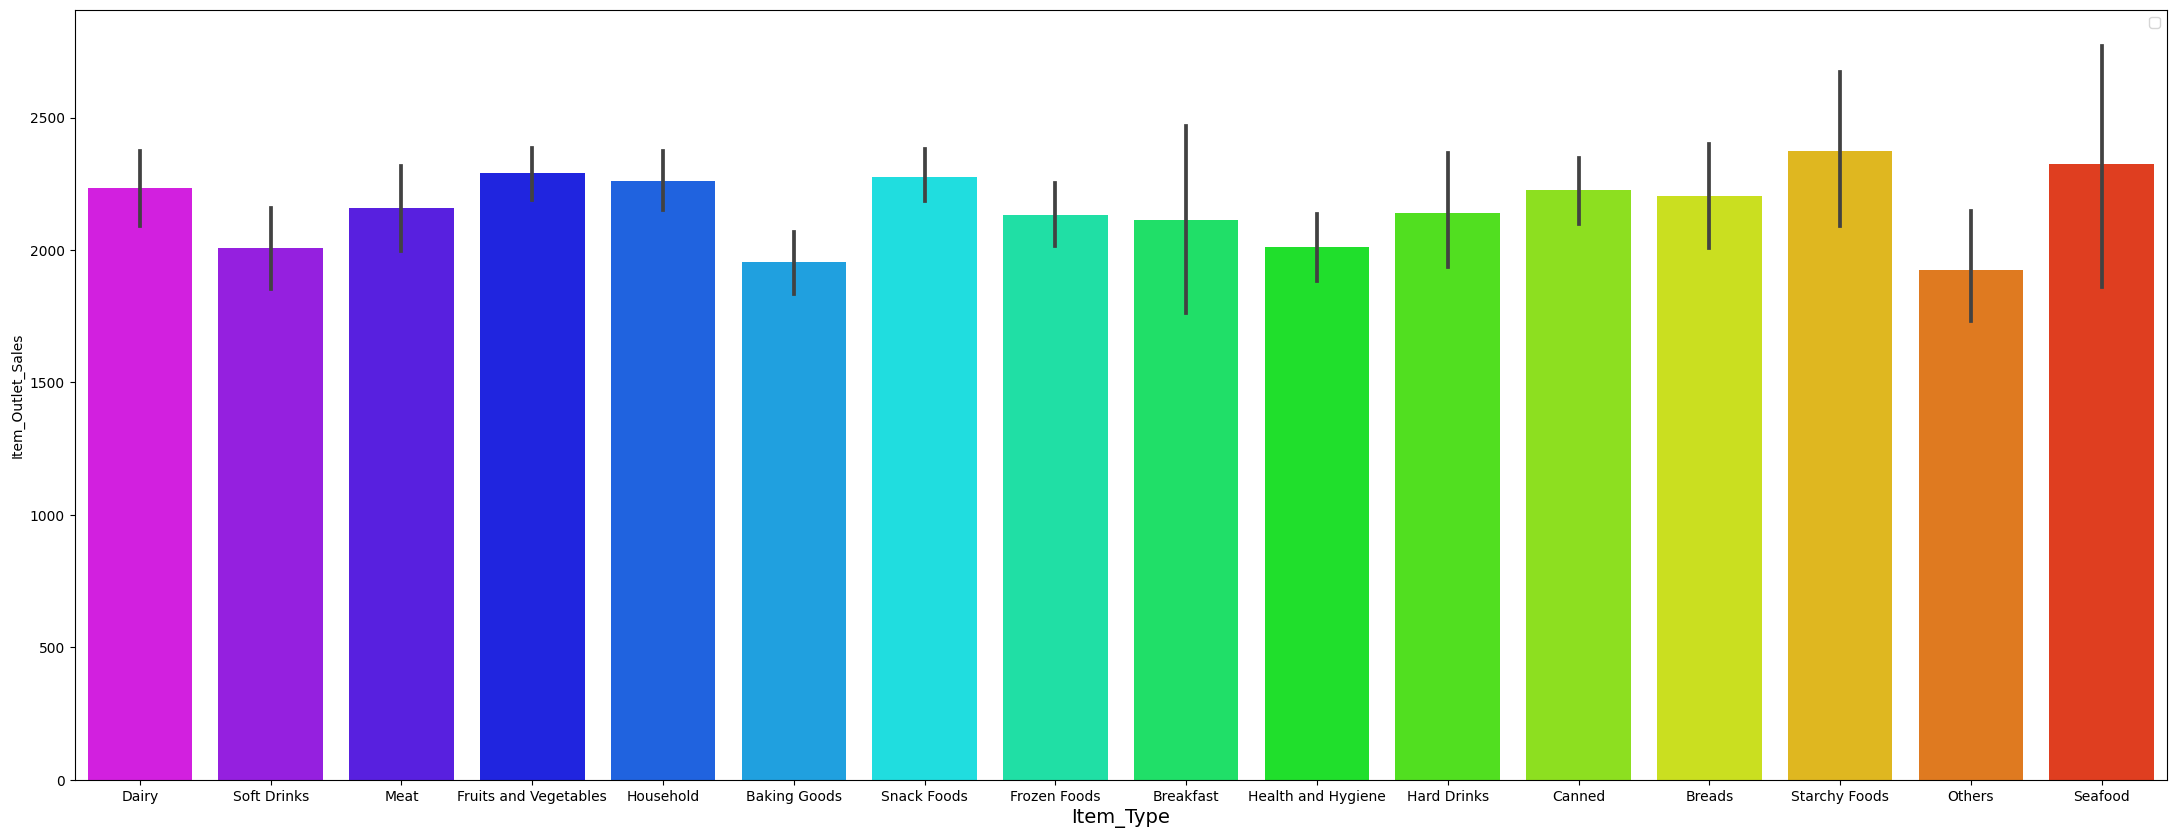

In [29]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=bm_tr ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

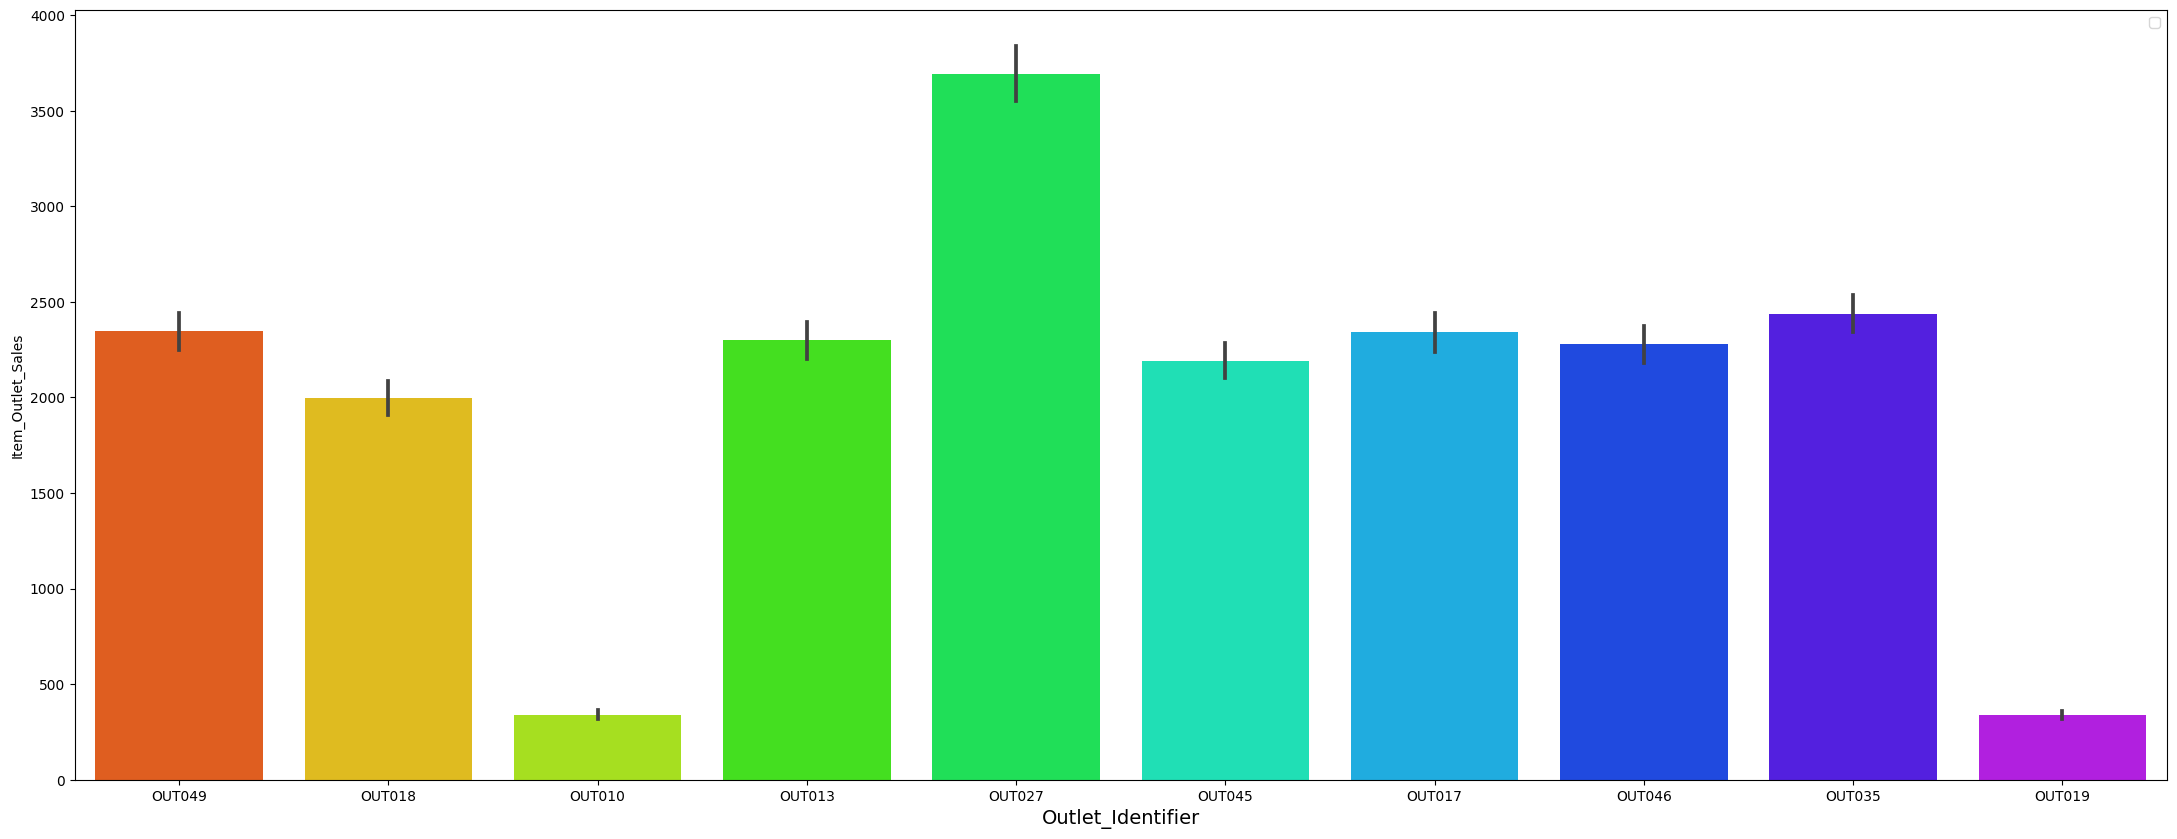

In [30]:
plt.figure(figsize=(27,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=bm_tr ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

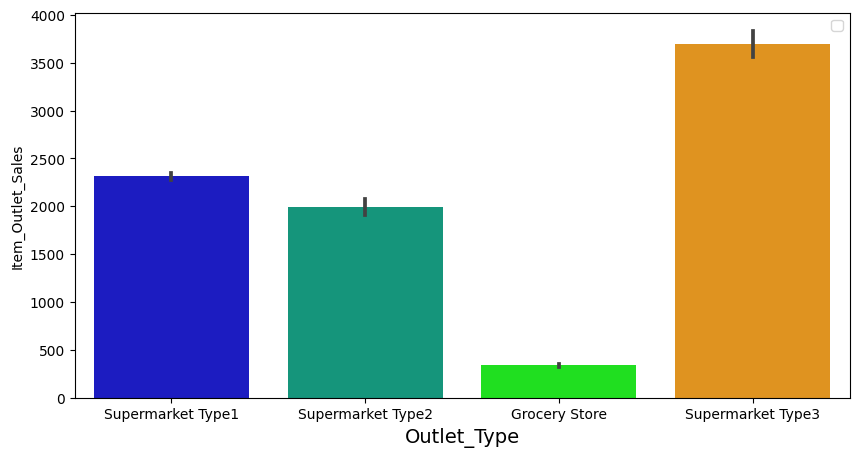

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=bm_tr ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

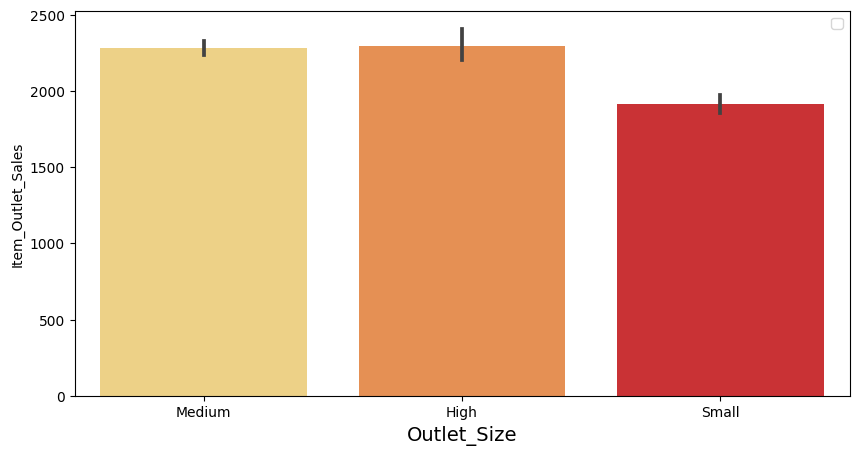

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=bm_tr ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

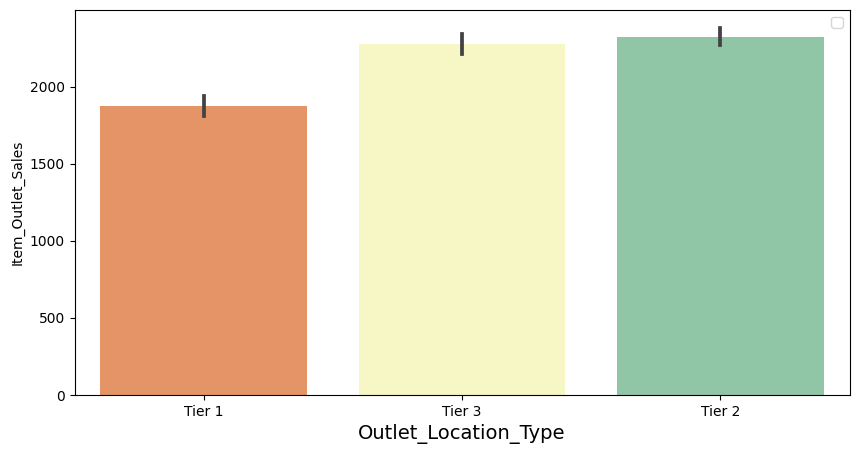

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=bm_tr ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

### Realizations:

* The difference in item types by sales is very small.
* Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.
* Suprisingly supermarket type 3 is the most profitable and not type 1.
* Medium and high outlet sizes are pretty much even in sales.
* Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

### Corraltion matrix

<ipython-input-34-6030fd73d9eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bm_tr.corr() ,cmap='rocket')


<Axes: >

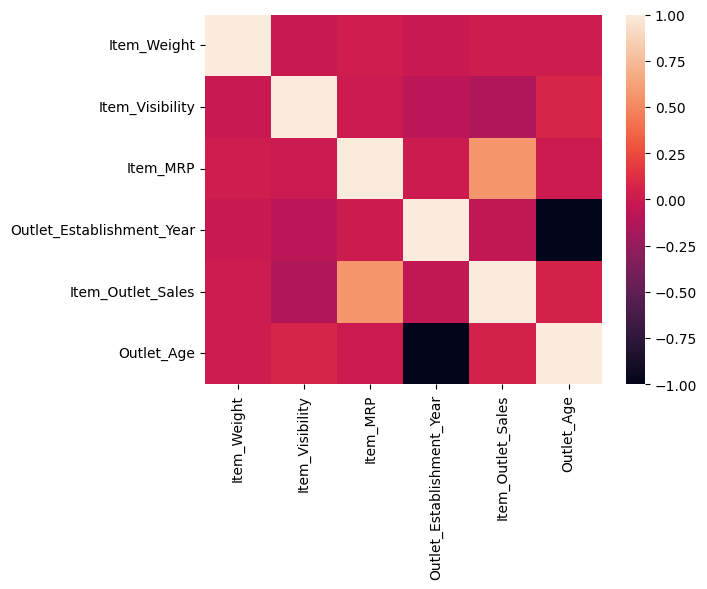

In [34]:
#plotting the correlation matrix
sns.heatmap(bm_tr.corr() ,cmap='rocket')

**We can see `Item_Outlet_Sales` is highly correlated with `Item_MRP`**

### Feature Engineering

**Categorical values**:

We have 7 columns we need to delete or encode.

* Ordinal variables:
    * `Item_Fat_Content`  
    * `Outlet_Size`  
    * `Outlet_Location_Type`
    
* Nominal variables:
    * `Item_Identifier `  
    * `Item_Type`
    * `Outlet_Identifier`
    * `Outlet_Type`

**Numeric values**:

* From the numeric variables `Outlet_Establishment_Year` is no longer needed

**Conclusion:**

In my FE process i have decided:

1. The columns `Outlet_Establishment_Year`, `Item_Identifier ` and `Outlet_Identifier` don't have significant values so we will drop them.
2. All Ordinal variables will be Label encoded.
3. The columns `Outlet_Type` and `Item_Type`  will be One Hot encoded.


In [36]:
BM_cat.apply(lambda x: x.nunique()) #checking the number of unique values in each column

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [37]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    bm_tr[i] = le.fit_transform(bm_tr[i])
    bm_te[i] = le.fit_transform(bm_te[i])

bm_tr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [ ]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(bm_tr[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(bm_te[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = bm_tr.index
te_oh.index = bm_te.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
tr_fe = pd.concat([bm_tr, tr_oh], axis=1)
te_fe = pd.concat([bm_te, te_oh], axis=1)

In [ ]:
# Dropping irrelevant columns

tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [ ]:
tr_fe.head()

## Machine learning models

![](https://media4.giphy.com/media/4TtTVTmBoXp8txRU0C/200w.webp?cid=ecf05e47hbwccgi1rqz8b91h2vj504ui7e6q02oscy461q42&rid=200w.webp)


First of all we will divide our dataset into two variables X as the features we defined earlier and y as the Item_Outlet_Sales the target value we want to predict.

## Assumptions:

* This is a regression problem so we will use Regression methods.

* Train test split will be a 8:2 ratio respectively.

# Models we will use:
* Linear Regression
* Random Forest Regressor
* Lasso Regressor

##The Process of Modeling the Data:
* Importing the model

* Fitting the model

* Predicting Item Outlet Sales

* Regression metrics

## Score Metrics for Regression:

* Mean Absolute Error (MAE) -
Mean of the absolute value of errors (absolute distance from true value):
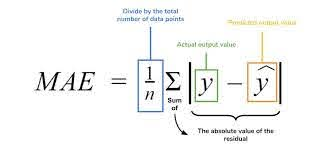

* Mean Squared Error (MSE) -
 Mean of the squared value of errors (squared distance from true value):
 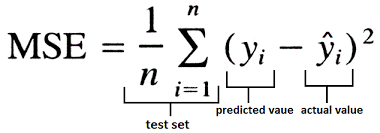

* R^2 (coefficient of determination) -
Regression score function.:

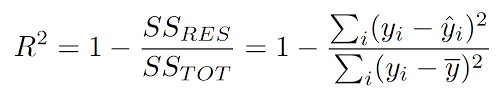

In [ ]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [ ]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

## Linear Regression

![](https://cdn.filestackcontent.com/WCbMsxiSLW2H1SyqunQm)

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine (more info on [wikipedia](https://en.wikipedia.org/wiki/Linear_regression)).def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')


In [ ]:
#model
LR = LinearRegression(normalize=True)

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

## Csv results of the test for our model:
![](https://media2.giphy.com/media/26DN2iTaW5mmmJtug/200.webp?cid=ecf05e47ceq530n5mwtmqi7lb6tg74y5k2ji2pte6j5ckita&rid=200.webp)

You can see each predition and true value side by side by the csv created in the output directory.

In [ ]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")

## Random Forest Regressor

![](https://lh3.googleusercontent.com/proxy/V_3AWj1s3kBvrcJEUczXaoNlIVmToUBGxo_wuNSM2B3NNUs1q31KuEETmfxw3jIfiJ5H3SkjTCs9rq8BOgRZnP-ZIZBjLwVMRMchhNeV0SJQknEdTd4dhjrULXqViViMORUPWvoGMQuGYol-sj5lIEXKuHo4ouNxp3-m-sOUkzDbZ10Ph-a769ugPqsTLvJLlfhr0sbSz6Y0=s0-d)

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression.
It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [ ]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

## Lasso Regressor

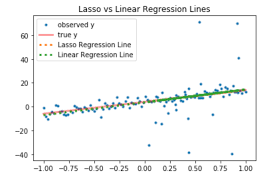

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces  - more info on [wikipedia.](https://en.wikipedia.org/wiki/Lasso_(statistics))


In [ ]:
#model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

# Conclusion

![](https://thumbs.gfycat.com/ShamelessRaggedErin-size_restricted.gif)

In [ ]:
MAE= [LR_MAE,RFR_MAE,LS_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

## Realizations

* `Item_MRP`  optimizes Maximum Outlet sales (positive correlation with the target).
* Linear Regression	and Lasso Regressor have the best perfomance in most categories.
* only a third of the observed variation can be explained by the model's inputs of Random Forest Regressor, there for it's performance is not optimal even though his cross validation is the highest.
* For better peformance this models need tuning e.g. Grid Search.

# **THANK YOU**  